<a href="https://colab.research.google.com/github/fereshtehdehkhoda/Example-47-Decision-Tree/blob/main/S13_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#----soale 1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("hw13_train.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          275 non-null    object 
 1   mpg           275 non-null    float64
 2   cylinders     275 non-null    int64  
 3   displacement  275 non-null    int64  
 4   horsepower    275 non-null    int64  
 5   weight        275 non-null    int64  
 6   acceleration  275 non-null    float64
 7   origin        275 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 17.3+ KB


In [ ]:
data['mpg'].mean()

23.283268482490268

In [ ]:
data['cylinders'].value_counts()

cylinders
4    131
8     69
6     53
5      2
3      2
Name: count, dtype: int64

In [ ]:
round(data['mpg'].corr(data['weight'],method='pearson'),2)

-0.84

In [ ]:
#----soale 2

In [ ]:
data['origin'].value_counts()

origin
american    173
japanese     52
european     50
Name: count, dtype: int64

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
270    False
271    False
272    False
273    False
274    False
Length: 275, dtype: bool

In [ ]:
data = data[~data['name'].str.contains('bmw', na=False)]

In [ ]:
#'cadillac','chevroelt','capri','chevy','hi','mercedes','nissan','toyouta'

In [ ]:
data = data[~data['name'].str.contains('cadillac', na=False)]

In [ ]:
data = data[~data['name'].str.contains('chevroelt', na=False)]

In [ ]:
data = data[~data['name'].str.contains('capri', na=False)]

In [ ]:
data = data[~data['name'].str.contains('chevy', na=False)]

In [ ]:
data = data[~data['name'].str.contains('hi', na=False)]

In [ ]:
data = data[~data['name'].str.contains('nissan', na=False)]

In [ ]:
data = data[~data['name'].str.contains('toyouta', na=False)]

In [ ]:
data.drop(axis='index',index=274,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 0 to 273
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          257 non-null    object 
 1   mpg           257 non-null    float64
 2   cylinders     257 non-null    int64  
 3   displacement  257 non-null    int64  
 4   horsepower    257 non-null    int64  
 5   weight        257 non-null    int64  
 6   acceleration  257 non-null    float64
 7   origin        257 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 18.1+ KB


In [ ]:
data['name'].value_counts()

name
toyota corolla           4
chevrolet impala         3
ford pinto               3
pontiac catalina         3
chevrolet nova           3
                        ..
dodge diplomat           1
dodge magnum xe          1
dodge monaco (sw)        1
dodge monaco brougham    1
vw rabbit                1
Name: count, Length: 210, dtype: int64

In [ ]:
data['Brand']=data['name'].str.split(' ',expand=True)[0]

In [ ]:
(data['Brand'].value_counts()/data.shape[0])*100

Brand
ford             13.618677
chevrolet        11.284047
dodge             8.949416
amc               7.392996
toyota            7.392996
plymouth          6.225681
datsun            5.447471
volkswagen        4.280156
buick             3.891051
pontiac           3.891051
honda             3.112840
oldsmobile        3.112840
fiat              2.723735
peugeot           2.723735
mazda             2.334630
volvo             1.945525
mercury           1.945525
chrysler          1.945525
audi              1.556420
opel              1.167315
saab              1.167315
subaru            1.167315
vw                1.167315
renault           0.778210
mercedes-benz     0.778210
Name: count, dtype: float64

In [ ]:
data['Brand'].value_counts()

Brand
ford             35
chevrolet        29
dodge            23
amc              19
toyota           19
plymouth         16
datsun           14
volkswagen       11
buick            10
pontiac          10
honda             8
oldsmobile        8
fiat              7
peugeot           7
mazda             6
volvo             5
mercury           5
chrysler          5
audi              4
opel              3
saab              3
subaru            3
vw                3
renault           2
mercedes-benz     2
Name: count, dtype: int64

In [ ]:
#data.loc[data['Brand'].isin(['cadillac',
                           # 'renault','bmw','capri','mercedes','hi',
                          #  'mercedes-benz','chevroelt','toyouta','nissan']), 'Brand'] = 'other' #0.717

In [ ]:
#data.loc[data['Brand'].isin(['dodge','amc','toyota','plymouth','datsun','volkswagen','pontiac','buick','oldsmobile', 'mercury', 'honda', 'fiat', 'peugeot', 'mazda','chrysler','volvo','audi',
                             #'vw','chevy','saab','opel','subaru','cadillac',
                            #'renault','bmw','capri','mercedes','hi',
                            #'mercedes-benz','chevroelt','toyouta','nissan']), 'Brand'] = 'other'

In [ ]:
#data.loc[data['Brand'].isin([
                           # 'vw','audi','saab','opel',
                          # 'subaru','renault']), 'Brand'] = 'other'

In [ ]:
#data.loc[data['Brand'].isin(['oldsmobile','honda','fiat','peugeot','mazda','chrysler','volvo',
                          #  'mercury','vw','audi','saab','opel',
                           # 'subaru','renault']), 'Brand'] = 'other'

In [ ]:
dummy_vars=pd.get_dummies(data[['origin','Brand']])
dummy_vars

,origin_american,origin_european,origin_japanese,Brand_amc,Brand_audi,Brand_buick,Brand_chevrolet,Brand_chrysler,Brand_datsun,Brand_dodge,...,Brand_peugeot,Brand_plymouth,Brand_pontiac,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,Brand_vw
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
270,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
271,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
272,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
features=['cylinders','displacement','horsepower','weight','acceleration']
X_train=data[features]

In [ ]:
X_train=pd.concat([X_train,dummy_vars],axis=1)
X_train

,cylinders,displacement,horsepower,weight,acceleration,origin_american,origin_european,origin_japanese,Brand_amc,Brand_audi,...,Brand_peugeot,Brand_plymouth,Brand_pontiac,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,Brand_vw
0,8,360,175,3821,11.0,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,8,390,190,3850,8.5,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,8,304,150,3672,11.5,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,6,232,90,3210,17.2,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,4,151,90,3003,20.1,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,6,163,125,3140,13.6,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
270,6,145,76,3160,19.6,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
271,4,90,48,2335,23.7,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
272,4,97,52,2130,24.6,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
y_train=data['mpg']

In [ ]:
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()
model_1.fit(X_train,y_train)
y_train_pred_1=model_1.predict(X_train)
from sklearn.metrics import r2_score
print("R2: ", r2_score(y_train_pred_1,y_train))

R2:  0.7215019928828748


In [ ]:
#------------soale 3

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error

In [ ]:
print("MAPE: ",mean_absolute_percentage_error(y_train,y_train_pred_1)*100)

MAPE:  12.558989555889


In [ ]:
print("MAE: ", mean_absolute_error(y_train,y_train_pred_1))

MAE:  2.7958651182919394


In [ ]:
print(model_1.coef_)

[-1.00136011e+00  1.47947273e-02 -5.78212747e-02 -4.83123001e-03
  6.58293857e-03 -8.39336892e-01  1.76097210e-01  6.63239682e-01
 -2.72043419e+00  7.52585414e-01  8.43731649e-01 -4.12037546e-01
  1.30191732e+00  6.38543157e-01  9.32832432e-01 -1.26378298e+00
 -1.27732536e+00  1.15892546e+00  3.61198807e-01  3.03735997e+00
 -2.36874340e+00  1.88150583e+00 -3.57008311e+00 -1.57799967e+00
  1.50317122e-01  8.28899251e-01  7.28298829e-01 -1.84502989e+00
 -4.08690878e-01 -1.08673686e+00 -1.34267077e+00 -2.49309689e+00
  7.75051630e+00]


In [ ]:
#------soale4

In [ ]:
dtest=pd.read_csv("hw13_test.csv")

In [ ]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          117 non-null    object 
 1   mpg           117 non-null    float64
 2   cylinders     117 non-null    int64  
 3   displacement  117 non-null    float64
 4   horsepower    117 non-null    int64  
 5   weight        117 non-null    int64  
 6   acceleration  117 non-null    float64
 7   origin        117 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 7.4+ KB


In [ ]:
np.sum(dtest.duplicated())

0

In [ ]:
dtest['origin'].value_counts()

origin
american    72
japanese    27
european    18
Name: count, dtype: int64

In [ ]:
dtest = dtest[~dtest['name'].str.contains('maxda', na=False)]

In [ ]:
dtest = dtest[~dtest['name'].str.contains('triumph', na=False)]

In [ ]:
dtest = dtest[~dtest['name'].str.contains('vokswagen', na=False)]

In [ ]:
dtest['name'].value_counts()

name
amc matador                  3
ford pinto                   2
chevrolet caprice classic    2
chevrolet chevette           2
amc gremlin                  2
                            ..
dodge coronet brougham       1
vw rabbit                    1
chevrolet nova custom        1
dodge colt hardtop           1
ford futura                  1
Name: count, Length: 104, dtype: int64

In [ ]:
dtest['Brand']=dtest['name'].str.split(' ',expand=True)[0]

In [ ]:
dtest['Brand'].value_counts()

Brand
plymouth         15
chevrolet        13
ford             12
datsun            9
amc               8
buick             7
pontiac           6
toyota            6
dodge             5
honda             5
volkswagen        4
mazda             4
audi              3
mercury           3
vw                2
oldsmobile        2
saab              1
volvo             1
chrysler          1
renault           1
opel              1
mercedes-benz     1
subaru            1
fiat              1
peugeot           1
Name: count, dtype: int64

In [ ]:
#dtest.loc[dtest['Brand'].isin(['mazda','volkswagen','mercury','audi','vw',
                          #  'oldsmobile','opel','fiat','subaru','mercedes-benz',
                          #  'volvo','renault','chrysler','triumph','saab','peugeot']), 'Brand'] = 'other'

In [ ]:
dummy_vars1=pd.get_dummies(dtest[['origin','Brand']])
dummy_vars1

,origin_american,origin_european,origin_japanese,Brand_amc,Brand_audi,Brand_buick,Brand_chevrolet,Brand_chrysler,Brand_datsun,Brand_dodge,...,Brand_peugeot,Brand_plymouth,Brand_pontiac,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,Brand_vw
0,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
114,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
115,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
features=['cylinders','displacement','horsepower','weight','acceleration']
X_test=dtest[features]

In [ ]:
X_test=pd.concat([X_test,dummy_vars1],axis=1)
X_test

,cylinders,displacement,horsepower,weight,acceleration,origin_american,origin_european,origin_japanese,Brand_amc,Brand_audi,...,Brand_peugeot,Brand_plymouth,Brand_pontiac,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,Brand_vw
0,8,318.0,150,4096,13.0,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,6,258.0,110,2962,13.5,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,6,173.0,115,2595,11.3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,140.0,90,2408,19.5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,105.0,75,2230,14.5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,6,231.0,110,3039,15.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113,4,144.0,96,2665,13.9,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
114,4,140.0,88,2720,15.4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
115,6,225.0,105,3613,16.5,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
y_test=dtest['mpg']

In [ ]:
y_test_pred_1=model_1.predict(X_test)
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE test: ", mean_absolute_percentage_error(y_test_pred_1,y_test)*100)

MAPE test:  13.567896358538306


In [ ]:
#-----soale5

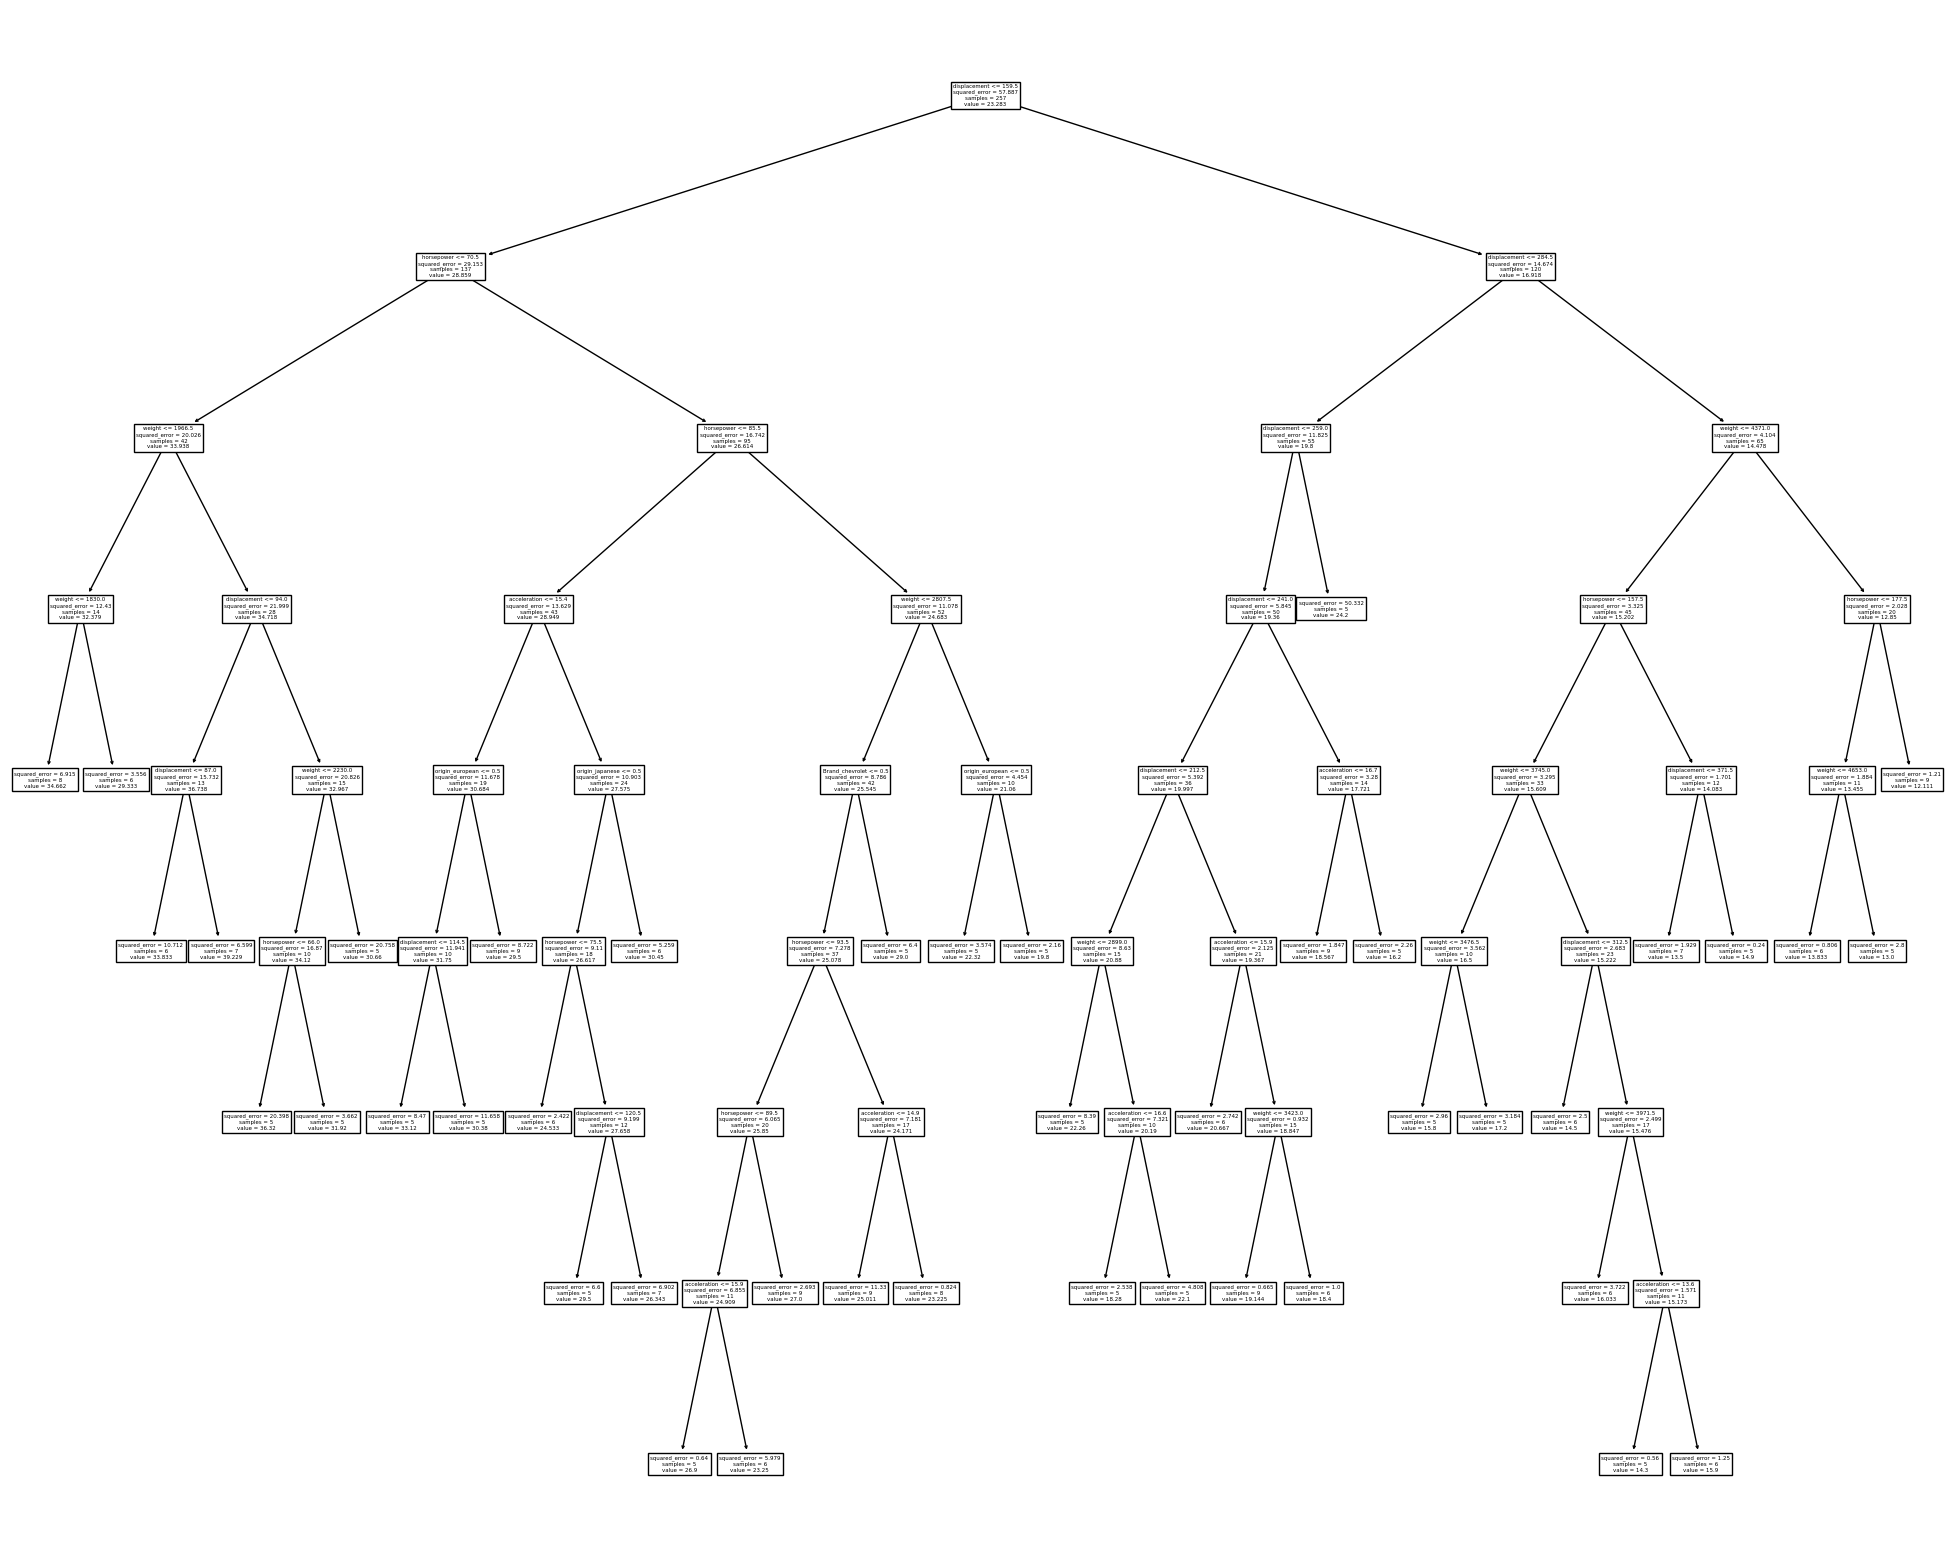

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
model_1=DecisionTreeRegressor(criterion='squared_error',
                             max_depth=10,
                             min_samples_leaf=5,
                             ccp_alpha=0)

model_1.fit(X_train,y_train)
from sklearn.tree import plot_tree
plt.figure(figsize=(25,20))
plot_tree(model_1,feature_names=X_train.columns)
plt.show()

In [ ]:
prunning_path=model_1.cost_complexity_pruning_path(X_train,y_train)
prunning_path

{'ccp_alphas': array([0.00000000e+00, 7.36941398e-03, 7.76307825e-03, 1.69367999e-02,
        1.90661479e-02, 2.22438392e-02, 2.25227747e-02, 3.47620171e-02,
        4.43118377e-02, 5.25735612e-02, 5.52373541e-02, 6.17743191e-02,
        7.00528071e-02, 7.30311284e-02, 7.97114334e-02, 9.18327569e-02,
        9.33084170e-02, 1.08809868e-01, 1.13120715e-01, 1.51994163e-01,
        1.71800259e-01, 2.03138935e-01, 2.57295720e-01, 2.63585000e-01,
        2.98093651e-01, 3.32262657e-01, 3.98899528e-01, 4.14319066e-01,
        6.32242706e-01, 1.66681068e+00, 3.28273698e+00, 6.07945462e+00,
        3.54946059e+01]),
 'impurities': array([ 5.67285413,  5.68022355,  5.68798662,  5.70492342,  5.72398957,
         5.74623341,  5.79127896,  5.82604098,  5.87035282,  5.92292638,
         5.97816373,  6.03993805,  6.10999086,  6.18302199,  6.26273342,
         6.53823169,  6.63154011,  6.95796971,  7.07109043,  7.22308459,
         7.56668511,  7.76982404,  8.02711976,  8.29070476,  8.58879841,
     

In [ ]:
alpha_grid=prunning_path['ccp_alphas']

In [ ]:
from sklearn.model_selection import cross_val_score
cv_errors=np.zeros(shape=len(alpha_grid))

for i in range(len(alpha_grid)):
    tree_reg=DecisionTreeRegressor(criterion='squared_error',
                                   max_depth=10,
                                   min_samples_leaf=5,
                                   ccp_alpha=alpha_grid[i])
    scores=cross_val_score(estimator=tree_reg,
                        X=X_train,
                        y=y_train,
                        scoring='neg_root_mean_squared_error',
                        cv=10,n_jobs=-1)

    cv_errors[i]=scores.mean()

best_alpha=alpha_grid[np.argmax(cv_errors)]
best_alpha

0.4143190661478453

In [ ]:
4.14319066e-01

0.414319066

In [ ]:
#----soale6

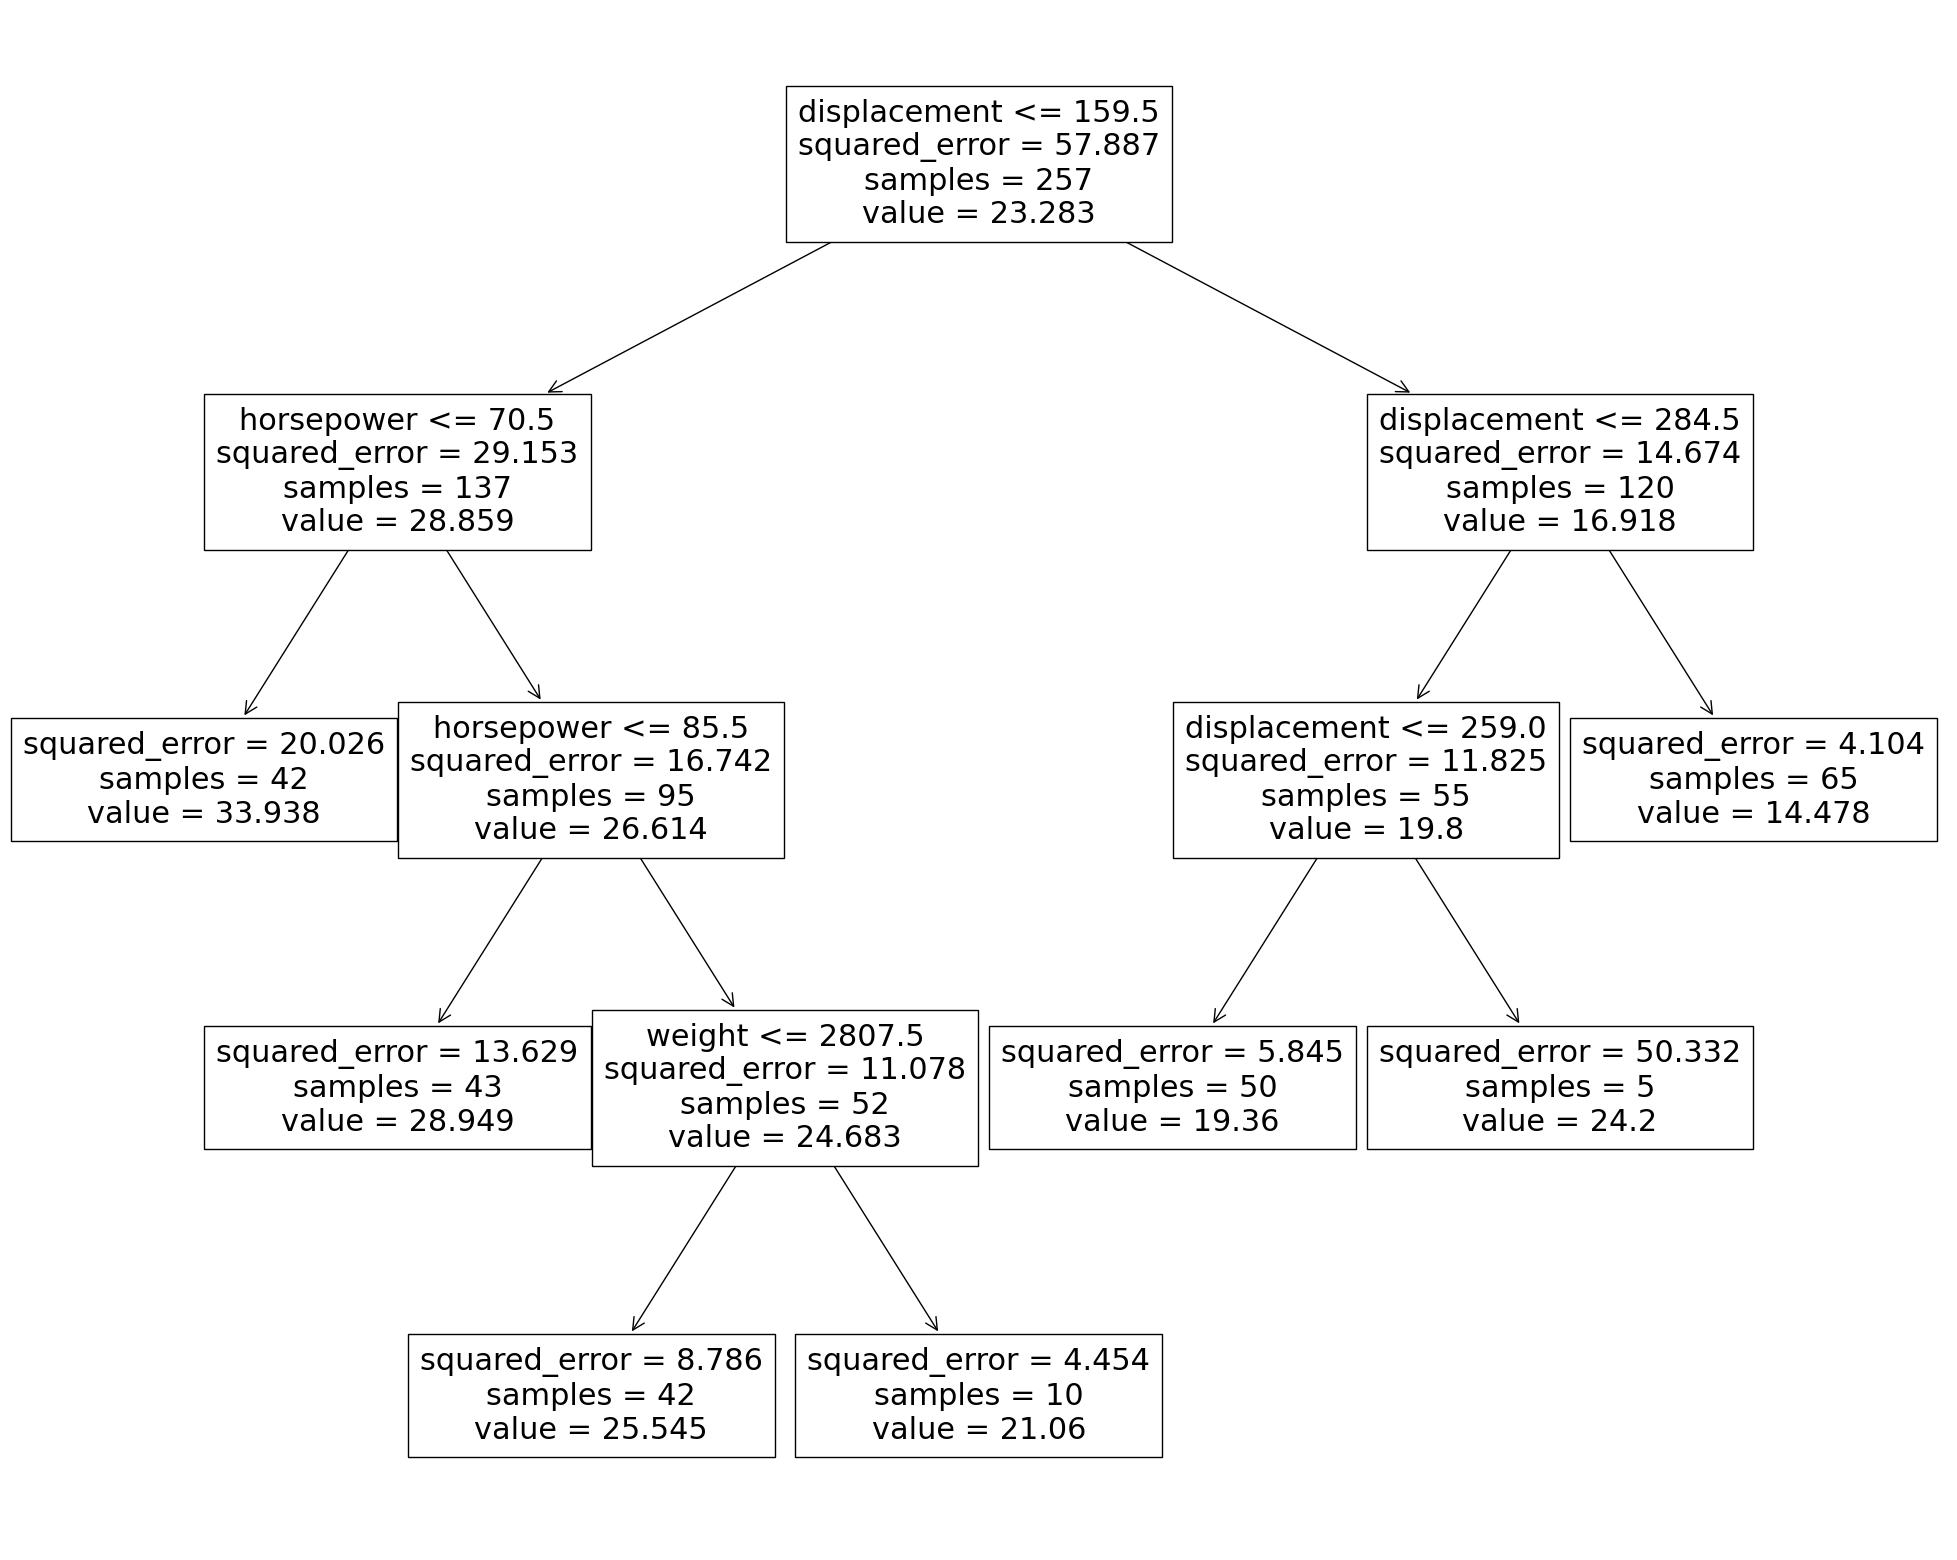

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
model_1=DecisionTreeRegressor(criterion='squared_error',
                             max_depth=10,
                             min_samples_leaf=5,
                             ccp_alpha=best_alpha)

model_1.fit(X_train,y_train)
from sklearn.tree import plot_tree
plt.figure(figsize=(25,20))
plot_tree(model_1,feature_names=X_train.columns)
plt.show()

In [ ]:
#-----soale7

In [ ]:
y_test_pred_1 = model_1.predict(X_test)


from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
print('MAPE: ', mean_absolute_percentage_error(y_test, y_test_pred_1) * 100)

MAPE:  14.549105550507987


In [ ]:
#----soale8

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_2=RandomForestRegressor(n_estimators=100,
                             max_features=3,
                             max_depth=10,
                             min_samples_leaf=5,
                             ccp_alpha = 0
                           )

model_2.fit(X_train,y_train)
y_train_pred_2 = model_2.predict(X_train)


from sklearn.metrics import mean_absolute_percentage_error


print('MAPE: ', mean_absolute_percentage_error(y_train, y_train_pred_2) * 100)

MAPE:  12.434847126545368


In [ ]:
#---soale 9

In [ ]:
import itertools
n_estimators = [100, 200, 50]
max_features = ['sqrt', None]
max_depth = [1,2, 5, 10]
min_samples_leaf = [2,5, 10, 15]
params_grid = list(itertools.product(n_estimators, max_features, max_depth, min_samples_leaf))
params_grid = pd.DataFrame(data = params_grid,
                           index = range(1, 97),
                           columns = ['n_estimators',
                                      'max_features',
                                      'max_depth',
                                      'min_samples_leaf'])
params_grid

,n_estimators,max_features,max_depth,min_samples_leaf
1,100,sqrt,1,2
2,100,sqrt,1,5
3,100,sqrt,1,10
4,100,sqrt,1,15
5,100,sqrt,2,2
...,...,...,...,...
92,50,None,5,15
93,50,None,10,2
94,50,None,10,5
95,50,None,10,10


In [ ]:
from sklearn.model_selection import cross_val_score


cv_errors = np.zeros(shape = len(params_grid)) #to save cv results
for i in range(len(params_grid)):
    rf_reg = RandomForestRegressor(n_estimators = params_grid.iloc[i, 0],
                                   max_features = params_grid.iloc[i, 1],
                                   criterion = 'squared_error',
                                   max_depth = params_grid.iloc[i, 2],
                                   min_samples_leaf = params_grid.iloc[i, 3],
                                   ccp_alpha = 0)
    scores = cross_val_score(estimator = rf_reg,
                             X = X_train,
                             y = y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 10, n_jobs = -1)
    cv_errors[i] = scores.mean()

params_grid.iloc[np.argmax(cv_errors), :]

n_estimators          50
max_features        None
max_depth              5
min_samples_leaf       2
Name: 89, dtype: object

In [ ]:
model_2 = RandomForestRegressor(n_estimators = params_grid.iloc[np.argmax(cv_errors), 0],
                                max_features = params_grid.iloc[np.argmax(cv_errors), 1],
                                criterion = 'squared_error',
                                max_depth = params_grid.iloc[np.argmax(cv_errors), 2],
                                min_samples_leaf = params_grid.iloc[np.argmax(cv_errors), 3],
                                ccp_alpha = 0
                                )

model_2.fit(X_test, y_test)

#Predict the response in the train
y_test_pred_2 = model_2.predict(X_test)
#Inverse transformation of predicted values

from sklearn.metrics import mean_absolute_percentage_error


print('MAPE: ', mean_absolute_percentage_error(y_train, y_train_pred_2) * 100)


MAPE:  12.434847126545368


In [ ]:
#-------soale 10

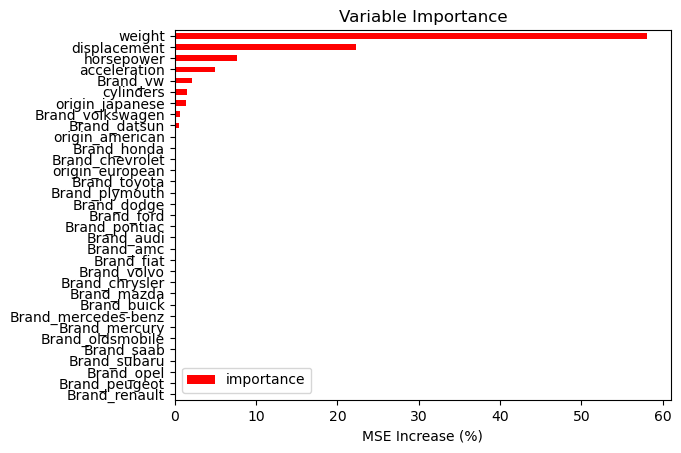

In [ ]:
importance = pd.DataFrame({'importance': model_2.feature_importances_ * 100},
                          index = X_train.columns)
importance.sort_values(by = 'importance', axis = 0, ascending = True).plot(kind = 'barh',
                                                                           color = 'r')
plt.title('Variable Importance')
plt.xlabel('MSE Increase (%)')
plt.show()